In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [20]:
df_ind = df[df['job_country'] == 'India']
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [21]:
df_ind['job_posted_month'] = df_ind['job_posted_date'].dt.strftime('%B')
df_ind['job_posted_month']

C:\Users\pawan\AppData\Local\Temp\ipykernel_6908\1370869590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind['job_posted_month'] = df_ind['job_posted_date'].dt.strftime('%B')


16            June
19           April
29           March
38            July
42        November
            ...   
785712       March
785715       March
785716       March
785718       March
785740       March
Name: job_posted_month, Length: 51088, dtype: object

In [27]:
df_pivot = df_ind.pivot_table(index= 'job_posted_month', columns= 'job_title_short', aggfunc= 'size')
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [ ]:
df_pivot = df_pivot.reset_index(inplace=True)
print(df_pivot)


                index job_posted_month     company_name                 \
job_title_short                        Business Analyst Cloud Engineer   
0                   4          January              175             31   
1                   3         February              143             35   
2                   7            March              116             37   
3                   0            April              170             32   
4                   8              May              103             14   
5                   6             June              146             26   
6                   5             July              142             25   
7                   1           August              189             25   
8                  11        September              155             34   
9                  10          October              170             36   
10                  9         November              192             29   
11                  2         December

In [11]:
df_pivot['month_no'] = pd.to_datetime(df_pivot['job_posted_month'], format='%B').dt.month
df_pivot = df_pivot.sort_values(by='month_no')
df_pivot = df_pivot.drop(columns=['month_no'])
df_pivot


C:\Users\pawan\AppData\Local\Temp\ipykernel_6908\2039141270.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = df_pivot.drop(columns=['month_no'])


job_posted_month     company_name                              \
job_title_short                  Business Analyst Cloud Engineer Data Analyst   
4                        January              175             31          628   
3                       February              143             35          433   
7                          March              116             37          422   
0                          April              170             32          418   
8                            May              103             14          278   
6                           June              146             26          367   
5                           July              142             25          457   
1                         August              189             25          618   
11                     September              155             34          630   
10                       October              170             36          500   
9                       November              192             29          722   
2                       December              186             27          648   

                                                                        \
job_title_short Data Engineer Data Scientist Machine Learning Engineer   
4                        2132           1444                        70   
3                        1631            932                        42   
7                        1591           1005                        34   
0                        1565            945                        54   
8                        1384            836                        31   
6                        1632           1129                        41   
5                        1528           1123                        54   
1                        1407           1157                        47   
11                       1508            984                        67   
10                       1476            902                        85   
9                        1743           1614                        52   
2                        1464           1206                        94   

                                                          \
job_title_short Senior Data Analyst Senior Data Engineer   
4                               127                  448   
3                                94                  313   
7                                96                  351   
0                                86                  375   
8                                59                  329   
6                                66                  427   
5                                75                  359   
1                               126                  343   
11                               85                  324   
10                               67                  318   
9                               125                  423   
2                                77                  343   

                                       ...  search_location                 \
job_title_short Senior Data Scientist  ... Business Analyst Cloud Engineer   
4                                 269  ...              175             31   
3                                 165  ...              143             35   
7                                 194  ...              116             37   
0                                 194  ...              170             32   
8                                 134  ...              103             14   
6                                 238  ...              146             26   
5                                 204  ...              142             25   
1                                 235  ...              189             25   
11                                195  ...              155             34   
10                                180  ...              170             36   
9                                 278  ...              192        

In [17]:
top_5 = df['job_title_short'].value_counts().head(5).index.tolist()
top_5

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer']

In [29]:
df_pivot.reset_index(inplace=True)


In [ ]:
df_pivot.plot(x='job_posted_month', kind='bar', figsize=(12, 6))
plt.title('Top 5 Job Titles Posted in India by Month')

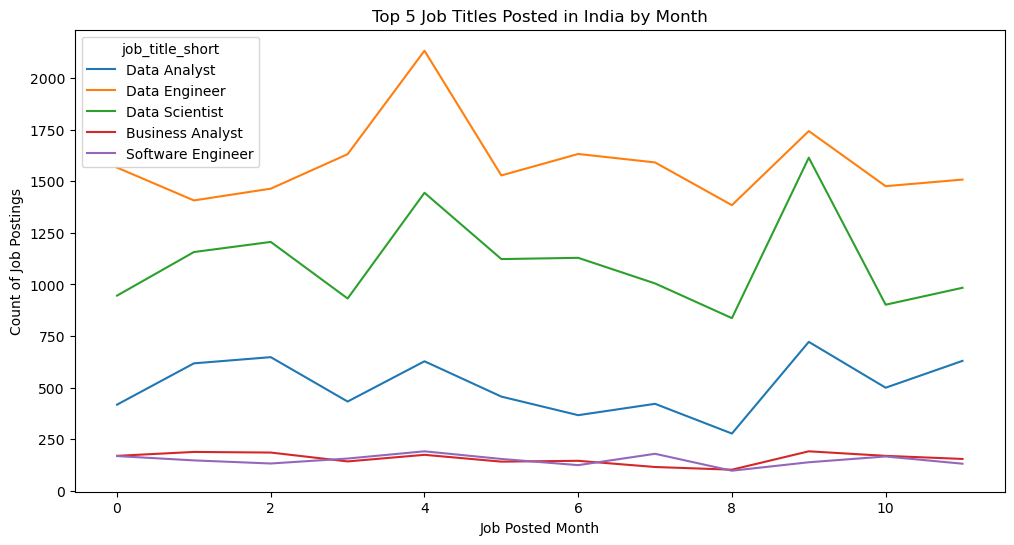

In [33]:
df_pivot[top_5].plot(kind='line', figsize=(12, 6))

plt.title('Top 5 Job Titles Posted in India by Month')
plt.ylabel("Count of Job Postings")
plt.xlabel("Job Posted Month")
plt.show()
